## Reservoir pressure profile

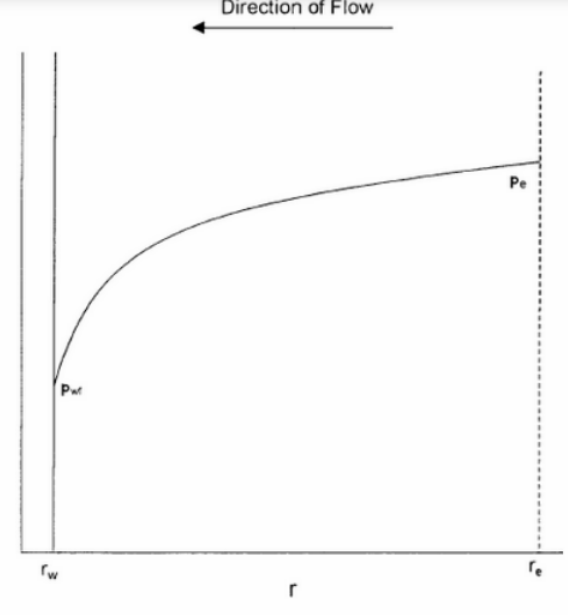

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('We4llbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1        

Outer radius of Reservoir(ft): 1800
We4llbore Radius(ft): 0.5
Bottomhole Pressure(PSI): 1500
Net Pay Thickness(ft): 60
Average Reservoir Permeability(mD): 150
Flowrate(STB/Day): 200
Oil Viscosity: 15


In [3]:
r = np.linspace(rw,re,500)

In [4]:
Pressure = []
for i in range(len(r)):
    P = Pwf+ (141.2*q*mu*B*(np.log(r[i]/rw))/k/h)
    Pressure.append(P)

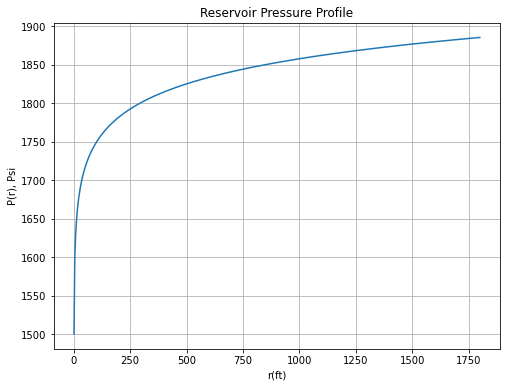

In [5]:
    plt.figure(figsize = [8,6])
    plt.plot(r,Pressure)
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.grid(True) 

## IPR for saturated reservoirs

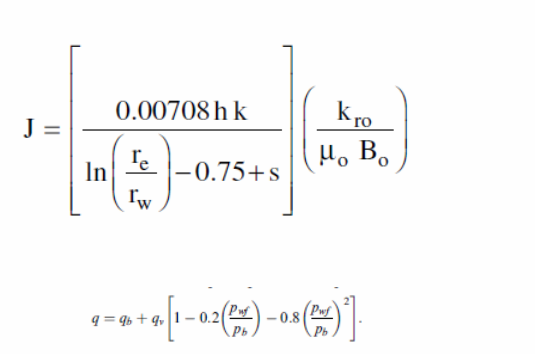

In [7]:
porosity = float(input("Enter Porosity: "))
K = float(input("Enter Perm.(md): "))
h = float(input("Enter pay zone thicknes(Feet): "))
P = float(input("Enter  Reservoir Pressure(psi): "))
Pb = float(input("Enter Bubble Point Pressure(psi): "))
Bo = float(input("Enter Formation Volume Factor: "))
Viscosity  = float(input("Enter fluid viscosity(cp): "))
ct = float(input("Enter Total Compressibility(psi-1): "))
A = float(input("Enter Drainage Area(Acres): "))
re = np.sqrt(43560*A/3.14)
rw = float(input("Enter Wellbore radius(ft): "))
S = float(input("Enter Skin Factor: "))

Enter Porosity: 0.19
Enter Perm.(md): 8.2
Enter pay zone thicknes(Feet): 53
Enter  Reservoir Pressure(psi): 5651
Enter Bubble Point Pressure(psi): 5651
Enter Formation Volume Factor: 1.1
Enter fluid viscosity(cp): 1.7
Enter Total Compressibility(psi-1): 0.0000129
Enter Drainage Area(Acres): 640
Enter Wellbore radius(ft): 0.328
Enter Skin Factor: 0


In [8]:
J = K*h/(141.2*Bo*Viscosity*(np.log(re/rw)-0.75+S))
print("The value of productivity index is", J)

The value of productivity index is 0.19678102247296522


In [9]:
qmax = J*P/1.8

In [10]:
print("The value of Qmax is ", qmax, "stb/day")

The value of Qmax is  617.783087774848 stb/day


In [11]:
a = np.arange(0,P,500)

In [12]:
a

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500.])

In [13]:
b = np.append(a,P)

In [14]:
b

array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
       4500., 5000., 5500., 5651.])

In [15]:
pwf = b[-1::-1]

In [16]:
pwf

array([5651., 5500., 5000., 4500., 4000., 3500., 3000., 2500., 2000.,
       1500., 1000.,  500.,    0.])

In [17]:
flowrate = []
for i in pwf:
    q = qmax*(1-0.2*(i/P)-0.8*((i/P)**2))
    flowrate.append(q)

In [18]:
flowrate

[0.0,
 29.361052575575666,
 121.54544965238878,
 205.99154977200774,
 282.69935293443274,
 351.6688591396637,
 412.9000683877007,
 466.3929806785436,
 512.1475960121925,
 550.1639143886474,
 580.4419358079083,
 602.9816602699751,
 617.783087774848]

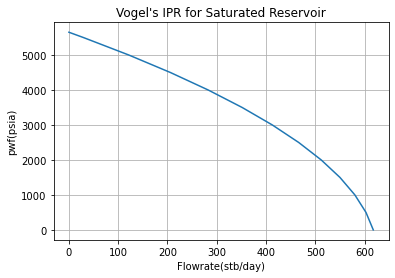

In [19]:
plt.figure()
plt.plot(flowrate,pwf)
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.title("Vogel's IPR for Saturated Reservoir")
plt.grid(True)
plt.show()

## Comparison Between Vogel and Fetkovich IPR

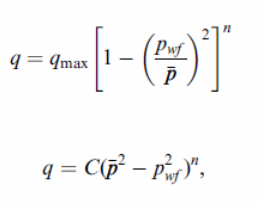

In [20]:
Pr = float(input("Enter the Reservoir Pressure(psia): "))
Pwf1 = float(input("Enter the first testing pressure(psia): "))
q1 = float(input("Enter the tested flowrate at first testing pressure(stb/day): "))
Pwf2 = float(input("Enter the second testing pressure(psia): "))
q2 = float(input("Enter the tested flowrate at second testing pressure(stb/day): "))

Enter the Reservoir Pressure(psia): 3000
Enter the first testing pressure(psia): 2000
Enter the tested flowrate at first testing pressure(stb/day): 500
Enter the second testing pressure(psia): 1000
Enter the tested flowrate at second testing pressure(stb/day): 800


In [21]:
# Vogel Calculation
qmax = float(q1/(1-0.2*(Pwf1/Pr)-0.8*(Pwf1/Pr)**2))

In [22]:
qmax

978.2608695652175

In [23]:
Pressures = np.arange(0,Pr+500,500)
flowrate_vogel = []
for i in Pressures:
    q = qmax*(1-0.2*(i/Pr)-0.8*((i/Pr)**2))
    flowrate_vogel.append(q)
flowrates_vogel = np.array(flowrate_vogel)

In [24]:
## fetkovich calculation
n = np.log10(q1/q2)/(np.log10((Pr**2-Pwf1**2)/(Pr**2-Pwf2**2)))
C = q1/((Pr**2-Pwf1**2)**n)

In [25]:
flowrate_Fetkovich = []
for j in Pressures:
    Q = float(C*((Pr**2-j**2)**n))
    flowrate_Fetkovich.append(Q)
flowrates_Fetkovich =np.array(flowrate_Fetkovich)

In [26]:
df = pd.DataFrame()
df['Pressures'] = Pressures
df['flowrate_vogel'] = flowrates_vogel
df['flowrate_Fetko'] = flowrates_Fetkovich

In [27]:
df

,Pressures,flowrate_vogel,flowrate_Fetko
0,0.0,978.260870,900.0
1,500.0,923.913043,875.0
2,1000.0,826.086957,800.0
3,1500.0,684.782609,675.0
4,2000.0,500.000000,500.0
5,2500.0,271.739130,275.0
6,3000.0,0.000000,0.0


   Pressures  flowrate_vogel  flowrate_Fetko
0        0.0      978.260870           900.0
1      500.0      923.913043           875.0
2     1000.0      826.086957           800.0
3     1500.0      684.782609           675.0
4     2000.0      500.000000           500.0
5     2500.0      271.739130           275.0
6     3000.0        0.000000             0.0


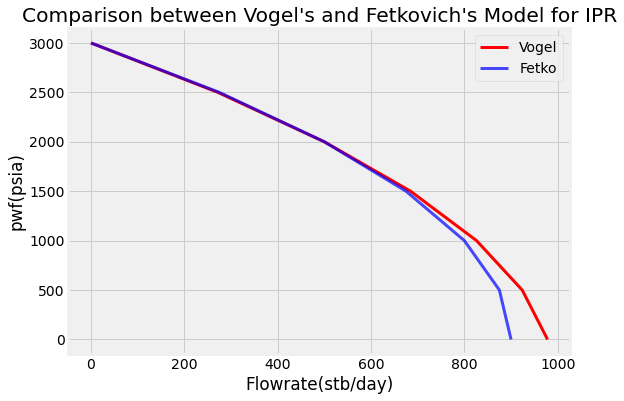

In [28]:
plt.figure(figsize = (9,6))
plt.style.use('fivethirtyeight')
plt.plot(flowrates_vogel,Pressures, c = "red",linewidth=3,label = 'Vogel')
plt.plot(flowrates_Fetkovich,Pressures,c= "blue" ,alpha = 0.7,linewidth=3,label = 'Fetko')
plt.xlabel("Flowrate(stb/day)")
plt.ylabel("pwf(psia)")
plt.grid(True)
plt.legend( loc = "best")
plt.title("Comparison between Vogel's and Fetkovich's Model for IPR")
print(df)

## Material Balance

### 1. Gas Material Balance

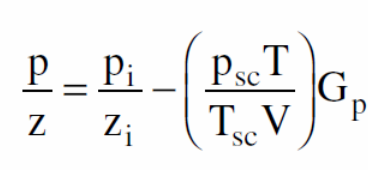

In [8]:
Time = [ 0,0.5,1,1.5,2]
ReservoirPressure = [1798,1680,1540,1428,1335]
Z = [0.869,0.870,0.880,0.890,0.900]
Gp = [0,0.96,2.12,3.21,3.92]

In [6]:
df = pd.DataFrame({"Time(years)":Time,"ReservoirPressure(psia)":ReservoirPressure, "Z factor": Z, "Cumulative Gas Produced Gp(MMMSCF)": Gp  })

In [7]:
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas Produced Gp(MMMSCF)
0,0.0,1798,0.869,0.00
1,0.5,1680,0.870,0.96
2,1.0,1540,0.880,2.12
3,1.5,1428,0.890,3.21
4,2.0,1335,0.900,3.92


In [9]:
df['P/Z'] = df['ReservoirPressure(psia)']/df['Z factor']

In [10]:
df

,Time(years),ReservoirPressure(psia),Z factor,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,0.0,1798,0.869,0.00,2069.044879
1,0.5,1680,0.870,0.96,1931.034483
2,1.0,1540,0.880,2.12,1750.000000
3,1.5,1428,0.890,3.21,1604.494382
4,2.0,1335,0.900,3.92,1483.333333


In [11]:
x = df["Cumulative Gas Produced Gp(MMMSCF)"]
y = df['P/Z']

(0.0, 2500.0)

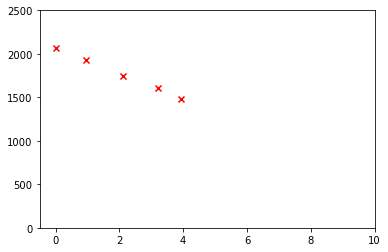

In [12]:
plt.scatter(x,y,marker = 'x',color = 'red')
plt.xlim(-0.5,10)
plt.ylim(0,2500)

In [13]:
model = np.polyfit(x,y,1)

In [14]:
model

array([-148.2874553 , 2070.38439919])

In [15]:
PZ = np.arange(model[1],0,-1)

In [16]:
GPP = (PZ-model[1])/model[0]

In [17]:
DF = pd.DataFrame({"Cumulative Gas Produced Gp(MMMSCF)": GPP, "P/Z": PZ})

In [18]:
DF

,Cumulative Gas Produced Gp(MMMSCF),P/Z
0,-0.000000,2070.384399
1,0.006744,2069.384399
2,0.013487,2068.384399
3,0.020231,2067.384399
4,0.026975,2066.384399
...,...,...
2066,13.932399,4.384399
2067,13.939143,3.384399
2068,13.945886,2.384399
2069,13.952630,1.384399


In [19]:
initial_gas_in_place =  (-model[1])/(model[0])

In [20]:
initial_gas_in_place

13.961965932657192

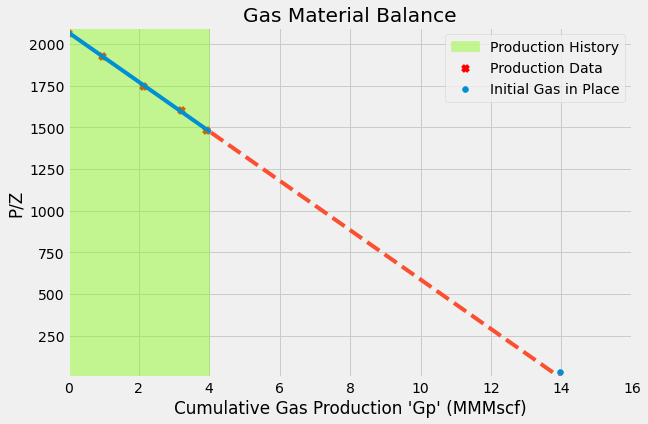

The Gas Initially in place is 13.961965932657192 MMMscf


In [21]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (9,6))
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][1:600],DF["P/Z"][1:600])
plt.plot(DF["Cumulative Gas Produced Gp(MMMSCF)"][601:2072],DF["P/Z"][601:2072], ls = "--")
plt.scatter(x,y,marker = 'x',color = 'red',label = "Production Data")
plt.scatter(initial_gas_in_place,30, label = "Initial Gas in Place")
plt.xlim(0,16)
plt.ylim(1,2100)
plt.axvspan(0,4,alpha=0.4,label='Production History',color='chartreuse')
plt.xlabel("Cumulative Gas Production 'Gp' (MMMscf)")
plt.ylabel("P/Z")
plt.title("Gas Material Balance")
plt.legend(loc='best')
plt.grid(True)
plt.show()
print("The Gas Initially in place is", initial_gas_in_place,"MMMscf")

## Oil Material Balance for Undersaturated

In [22]:
swi = float(input("Enter the intial water saturation(fraction) : "))
cw = float(input("Enter the compressibility of water(psi-1) : "))
cf = float(input("Enter the compressibility of formation(psi-1)) : "))
Pb = float(input("Enter the Bubble point pressure(psi) : "))

Enter the intial water saturation(fraction) : 0.24
Enter the compressibility of water(psi-1) : 0.00000362
Enter the compressibility of formation(psi-1)) : 0.00004952
Enter the Bubble point pressure(psi) : 1500


In [23]:
ReservoirPressure = [3685, 3680,3676,3667,3664,3640,3605,3567,3515,3448,3360,3275,3188]
No_of_producing_wells = [1,2,2,3,4,19,25,36,48,59,59,61,61]
Bo = [1.3102,1.3104,1.3104,1.3105,1.3105,1.3109,1.3116,1.3122,1.3128,1.3130,1.3150,1.3160,1.3170]
Np = [0,20.481,34.750,78.557,101.846,215.681,364.613, 542.985,841.591,1273.530 ,1691.887,2127.077,2575.330 ]
Wp = [0,0,0,0,0,0,0,0.159,0.805,2.579,5.008,6.5,8]

In [24]:
df = pd.DataFrame({"Reservoir Pressure":ReservoirPressure,"No_of_producing_wells":No_of_producing_wells, "Bo(rb/stb)": Bo, "Cumulative oil Produced Np(Mstb)": Np,"Cumulative water Produced Wp(Mstb)": Wp })


In [25]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb)
0,3685,1,1.3102,0.000,0.000
1,3680,2,1.3104,20.481,0.000
2,3676,2,1.3104,34.750,0.000
3,3667,3,1.3105,78.557,0.000
4,3664,4,1.3105,101.846,0.000
5,3640,19,1.3109,215.681,0.000
6,3605,25,1.3116,364.613,0.000
7,3567,36,1.3122,542.985,0.159
8,3515,48,1.3128,841.591,0.805
9,3448,59,1.3130,1273.530,2.579


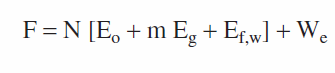

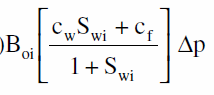

In [27]:
#the expansion of the initial water and the reduction in the pore volume
df["Efw"] = df["Bo(rb/stb)"] * ((((cw*swi)+ cf)*(3685-df["Reservoir Pressure"]))/(1-swi))

In [28]:
#the expansion of oil and its originally dissolved gas
df["Eo"] = df["Bo(rb/stb)"]- 1.3102

In [29]:
df["Eo+Efw"] = df['Efw']+df['Eo']

In [30]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000434,0.0002,0.000634
2,3676,2,1.3104,34.750,0.000,0.000782,0.0002,0.000982
3,3667,3,1.3105,78.557,0.000,0.001564,0.0003,0.001864
4,3664,4,1.3105,101.846,0.000,0.001825,0.0003,0.002125
5,3640,19,1.3109,215.681,0.000,0.003911,0.0007,0.004611
6,3605,25,1.3116,364.613,0.000,0.006957,0.0014,0.008357
7,3567,36,1.3122,542.985,0.159,0.010266,0.0020,0.012266
8,3515,48,1.3128,841.591,0.805,0.014797,0.0026,0.017397
9,3448,59,1.3130,1273.530,2.579,0.020632,0.0028,0.023432


In [31]:
df["F(Mbbl)"] = (df["Cumulative oil Produced Np(Mstb)"]*df["Bo(rb/stb)"]) + (df["Cumulative water Produced Wp(Mstb)"])

In [32]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw,F(Mbbl)
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000
1,3680,2,1.3104,20.481,0.000,0.000434,0.0002,0.000634,26.838302
2,3676,2,1.3104,34.750,0.000,0.000782,0.0002,0.000982,45.536400
3,3667,3,1.3105,78.557,0.000,0.001564,0.0003,0.001864,102.948949
4,3664,4,1.3105,101.846,0.000,0.001825,0.0003,0.002125,133.469183
5,3640,19,1.3109,215.681,0.000,0.003911,0.0007,0.004611,282.736223
6,3605,25,1.3116,364.613,0.000,0.006957,0.0014,0.008357,478.226411
7,3567,36,1.3122,542.985,0.159,0.010266,0.0020,0.012266,712.663917
8,3515,48,1.3128,841.591,0.805,0.014797,0.0026,0.017397,1105.645665
9,3448,59,1.3130,1273.530,2.579,0.020632,0.0028,0.023432,1674.723890


In [33]:
x = df["Eo+Efw"]
y = df["F(Mbbl)"]

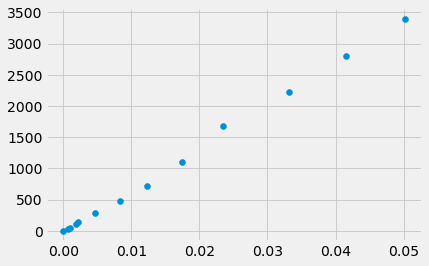

In [34]:
plt.scatter(x,y)

In [35]:
model = np.polyfit(x, y, 1)

In [36]:
model

array([ 6.83770762e+04, -3.40806113e+01])

## y = mx+c

In [37]:
df["F(Mbbl)_Fit"] = 6.83770762e+04*df["Eo+Efw"] - 3.40806113e+01

In [38]:
df

,Reservoir Pressure,No_of_producing_wells,Bo(rb/stb),Cumulative oil Produced Np(Mstb),Cumulative water Produced Wp(Mstb),Efw,Eo,Eo+Efw,F(Mbbl),F(Mbbl)_Fit
0,3685,1,1.3102,0.000,0.000,0.000000,0.0000,0.000000,0.000000,-34.080611
1,3680,2,1.3104,20.481,0.000,0.000434,0.0002,0.000634,26.838302,9.298113
2,3676,2,1.3104,34.750,0.000,0.000782,0.0002,0.000982,45.536400,33.060761
3,3667,3,1.3105,78.557,0.000,0.001564,0.0003,0.001864,102.948949,93.372586
4,3664,4,1.3105,101.846,0.000,0.001825,0.0003,0.002125,133.469183,111.195931
5,3640,19,1.3109,215.681,0.000,0.003911,0.0007,0.004611,282.736223,281.215130
6,3605,25,1.3116,364.613,0.000,0.006957,0.0014,0.008357,478.226411,537.335459
7,3567,36,1.3122,542.985,0.159,0.010266,0.0020,0.012266,712.663917,804.634552
8,3515,48,1.3128,841.591,0.805,0.014797,0.0026,0.017397,1105.645665,1155.461962
9,3448,59,1.3130,1273.530,2.579,0.020632,0.0028,0.023432,1674.723890,1568.105592


The Oil Initially in place is 68377.07619759711 STB given by slope of the straight line
Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' 


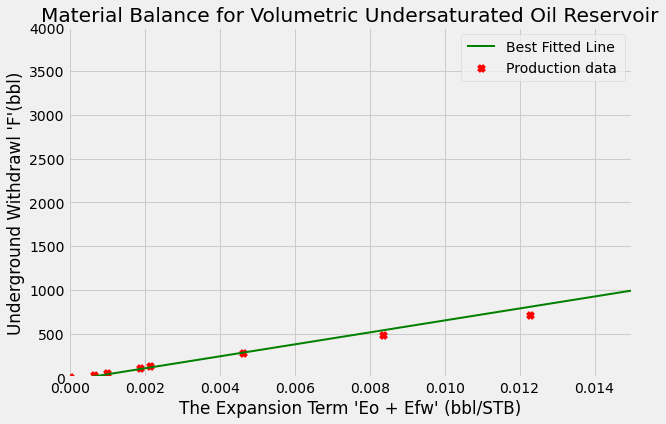

In [39]:
plt.figure(figsize = (9,6))
plt.scatter(x,y,marker = 'x',color = 'red',label = "Production data")
plt.plot(x,df["F(Mbbl)_Fit"], label = "Best Fitted Line ", color = 'green', lw = 2)

plt.xlim(-0.00005,0.015)
plt.ylim(-0.5,4000)
plt.xlabel("The Expansion Term 'Eo + Efw' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Volumetric Undersaturated Oil Reservoir")
plt.grid(True)
plt.legend(loc='best')

print("The Oil Initially in place is", model[0],"STB given by slope of the straight line")
print("Underground Withdrawl 'F'= Oil Initially in place(N)*The Expansion Term 'Eo + Efw' ")
plt.show()

## Gascap MBAL

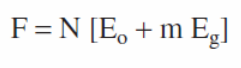

In [40]:
ReservoirPressure = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
Rp = [0,1050,1060,1160,1235,1265,1300]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Rs = [510,477,450,425,401,375,352]
Bg  = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]

In [41]:
df = pd.DataFrame({"Reservoir Pressure(psia)":ReservoirPressure,"Np(MMstb)" : Np,"Rp(scf/stb)":Rp,"Bo(rb/stb)":Bo,"Rs(scf/stb)":Rs,"Bg(rb/scf)":Bg})

In [42]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [43]:
#Total Underground Withdrawl F Term
df["F(MM rb)"] = df["Np(MMstb)"]*(df['Bo(rb/stb)']+(df["Rp(scf/stb)"]-df["Rs(scf/stb)"])*df["Bg(rb/scf)"])  

In [44]:
#The Eo Term expansion of oil and dissolved gas
df["Eo(rb/stb)"] = (df["Bo(rb/stb)"]- 1.2511 ) + (510- df["Rs(scf/stb)"])*df["Bg(rb/scf)"]

In [45]:
#The Eg Ter expansion of gas cap
df["Eg(rb/stb)"] = 1.2511*((df["Bg(rb/scf)"]/0.00087) - 1)

In [46]:
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb)
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555


In [47]:
dff = df

In [48]:
M = [0.3,0.4,0.5,0.6,0.7]

In [49]:
for i in M:
    dff["Eo+M{}Eg".format(i)] = dff["Eo(rb/stb)"] + i*dff["Eg(rb/stb)"]

In [50]:
dff

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889


The Oil Initially in place is 155.43003852376876 MMSTB for m =  0.3
The Oil Initially in place is 131.7771207196105 MMSTB for m =  0.4
The Oil Initially in place is 114.37046619758793 MMSTB for m =  0.5
The Oil Initially in place is 101.02489219651801 MMSTB for m =  0.6
The Oil Initially in place is 90.46788437559394 MMSTB for m =  0.7


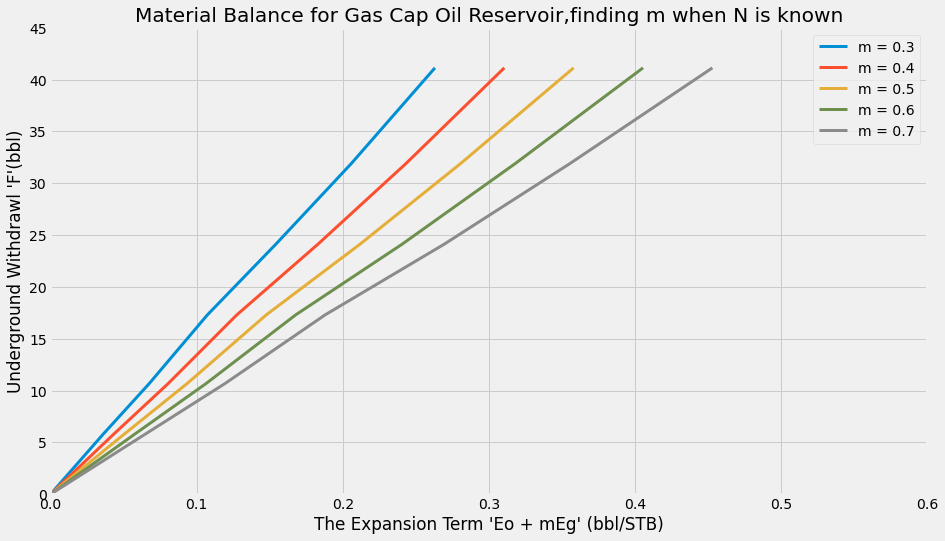

In [51]:
plt.figure(figsize = (14,8))
plt.style.use('fivethirtyeight')

plt.xlim(0,0.6)
plt.ylim(0,45)
    
plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Gas Cap Oil Reservoir,finding m when N is known")

for i in M:
    plt.plot(dff["Eo+M{}Eg".format(i)],dff["F(MM rb)"],label = "m = {}".format(i) ,lw = 3)
    plt.legend(loc='best')
    xx = dff["Eo+M{}Eg".format(i)]
    yy = dff["F(MM rb)"]
    Model = np.polyfit(xx, yy, 1)
    print("The Oil Initially in place is", Model[0],"MMSTB for m = ", i )